# Creator : Dipesh Kurasau

# Task#1 Decision Tree (Iris Dataset) 

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')

### Mapping Target Labels

In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
mapping = {'Iris-setosa' : 1, 'Iris-versicolor' : 2, 'Iris-virginica' : 3}
df['Target'] = df['Species'].map(mapping)

In [6]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1


### Create a pandas Series for Target and Label

In [7]:
Species_label = pd.Series(data=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], index=[1,2,3])

In [8]:
columns_to_keep = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Target']
df = df[columns_to_keep]

### Visualize Data

In [9]:
SepalLengthCm_mean = []
SepalWidthCm_mean = []
PetalLengthCm_mean = []
PetalWidthCm_mean = []
for i in range(1,4):
    temp_df = df[df['Target'] == i]
    SepalLengthCm_mean.append(temp_df['SepalLengthCm'].mean())
    SepalWidthCm_mean.append(temp_df['SepalWidthCm'].mean())
    PetalLengthCm_mean.append(temp_df['PetalLengthCm'].mean())
    PetalWidthCm_mean.append(temp_df['PetalWidthCm'].mean())

<IPython.core.display.Javascript object>


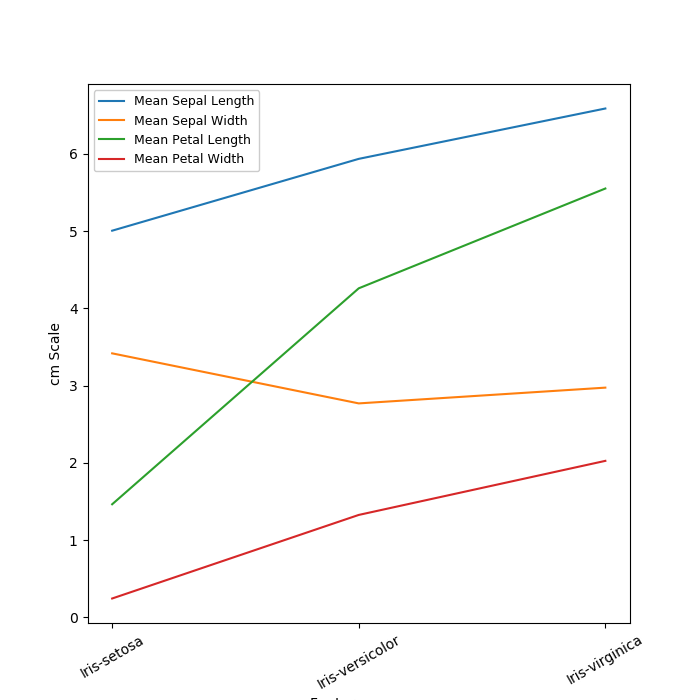

In [10]:
plt.figure(figsize=(7,7), dpi=80)
X_label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.plot(X_label,SepalLengthCm_mean,label ="Mean Sepal Length")
plt.plot(X_label,SepalWidthCm_mean,label ="Mean Sepal Width")
plt.plot(X_label,PetalLengthCm_mean,label ="Mean Petal Length")
plt.plot(X_label,PetalWidthCm_mean,label ="Mean Petal Width")

plt.legend(loc='upper left', fontsize=9, frameon=True, framealpha=1)
plt.xticks(rotation=30)
plt.xlabel("Feature name")
plt.ylabel("cm Scale")
plt.show()

# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz

### Function to Plot Decision Tree

In [12]:
def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)

### Function to Display Features Importance

In [13]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

#### Spliting Data into Train and Test datasets

In [14]:
columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X_train, X_test, y_train, y_test = train_test_split(df[columns], 
                                                    df['Target'], 
                                                    random_state=0)

In [15]:
model = DecisionTreeClassifier(max_depth = 5).fit(X_train,y_train)

## Plot Decision Tree

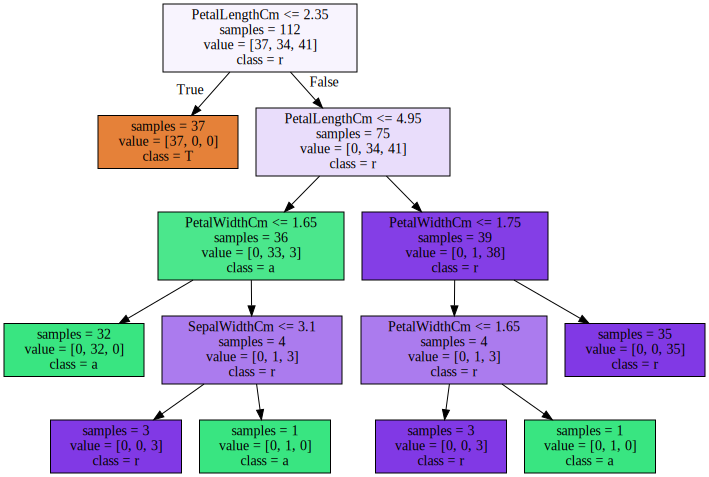

In [16]:
plot_decision_tree(model, df.columns[:-1], df.columns[-1])

## Plot Feature Importance

<IPython.core.display.Javascript object>


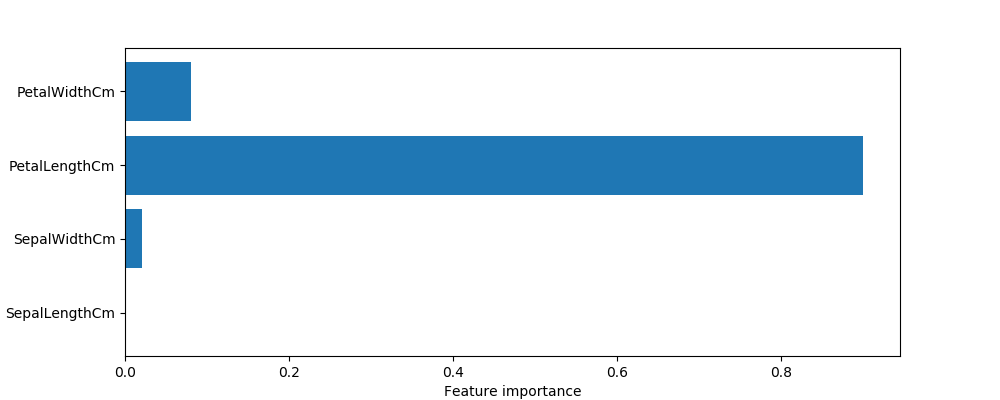

Feature importances: [0.         0.02014872 0.89994526 0.07990602]


In [17]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(model, df.columns[:-1])
plt.show()

print('Feature importances: {}'.format(model.feature_importances_))

In [18]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


#### Predict New Data

In [19]:
## Enter Space Seperated Data
## SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
new_data = list(map(float,input().split()))

5.0 3.9 2.0 0.6


In [20]:
data_predicted = model.predict([new_data])

In [21]:
print(f"Predicetd Target for SepalLengthCm {new_data[0]},SepalWidthCm {new_data[1]},PetalLengthCm {new_data[2]},PetalWidthCm {new_data[3]} is '{Species_label[data_predicted[0]]}'")

Predicetd Target for SepalLengthCm 5.0,SepalWidthCm 3.9,PetalLengthCm 2.0,PetalWidthCm 0.6 is 'Iris-setosa'
